In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Customer_Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
X = data.iloc[:,3:-1]
y = data['Exited']
X.shape, y.shape

((10000, 10), (10000,))

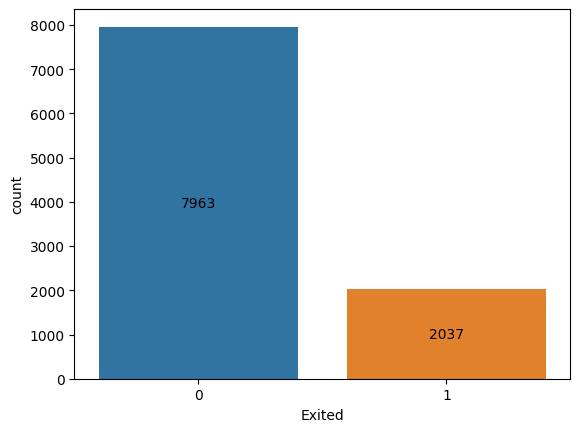

In [5]:
ax = sns.countplot(x=y)
ax.bar_label(ax.containers[0], label_type= 'center')
plt.show()

In [6]:
X.columns
columns = ['Geography', 'Gender','Tenure','NumOfProducts', 'HasCrCard', 'IsActiveMember']

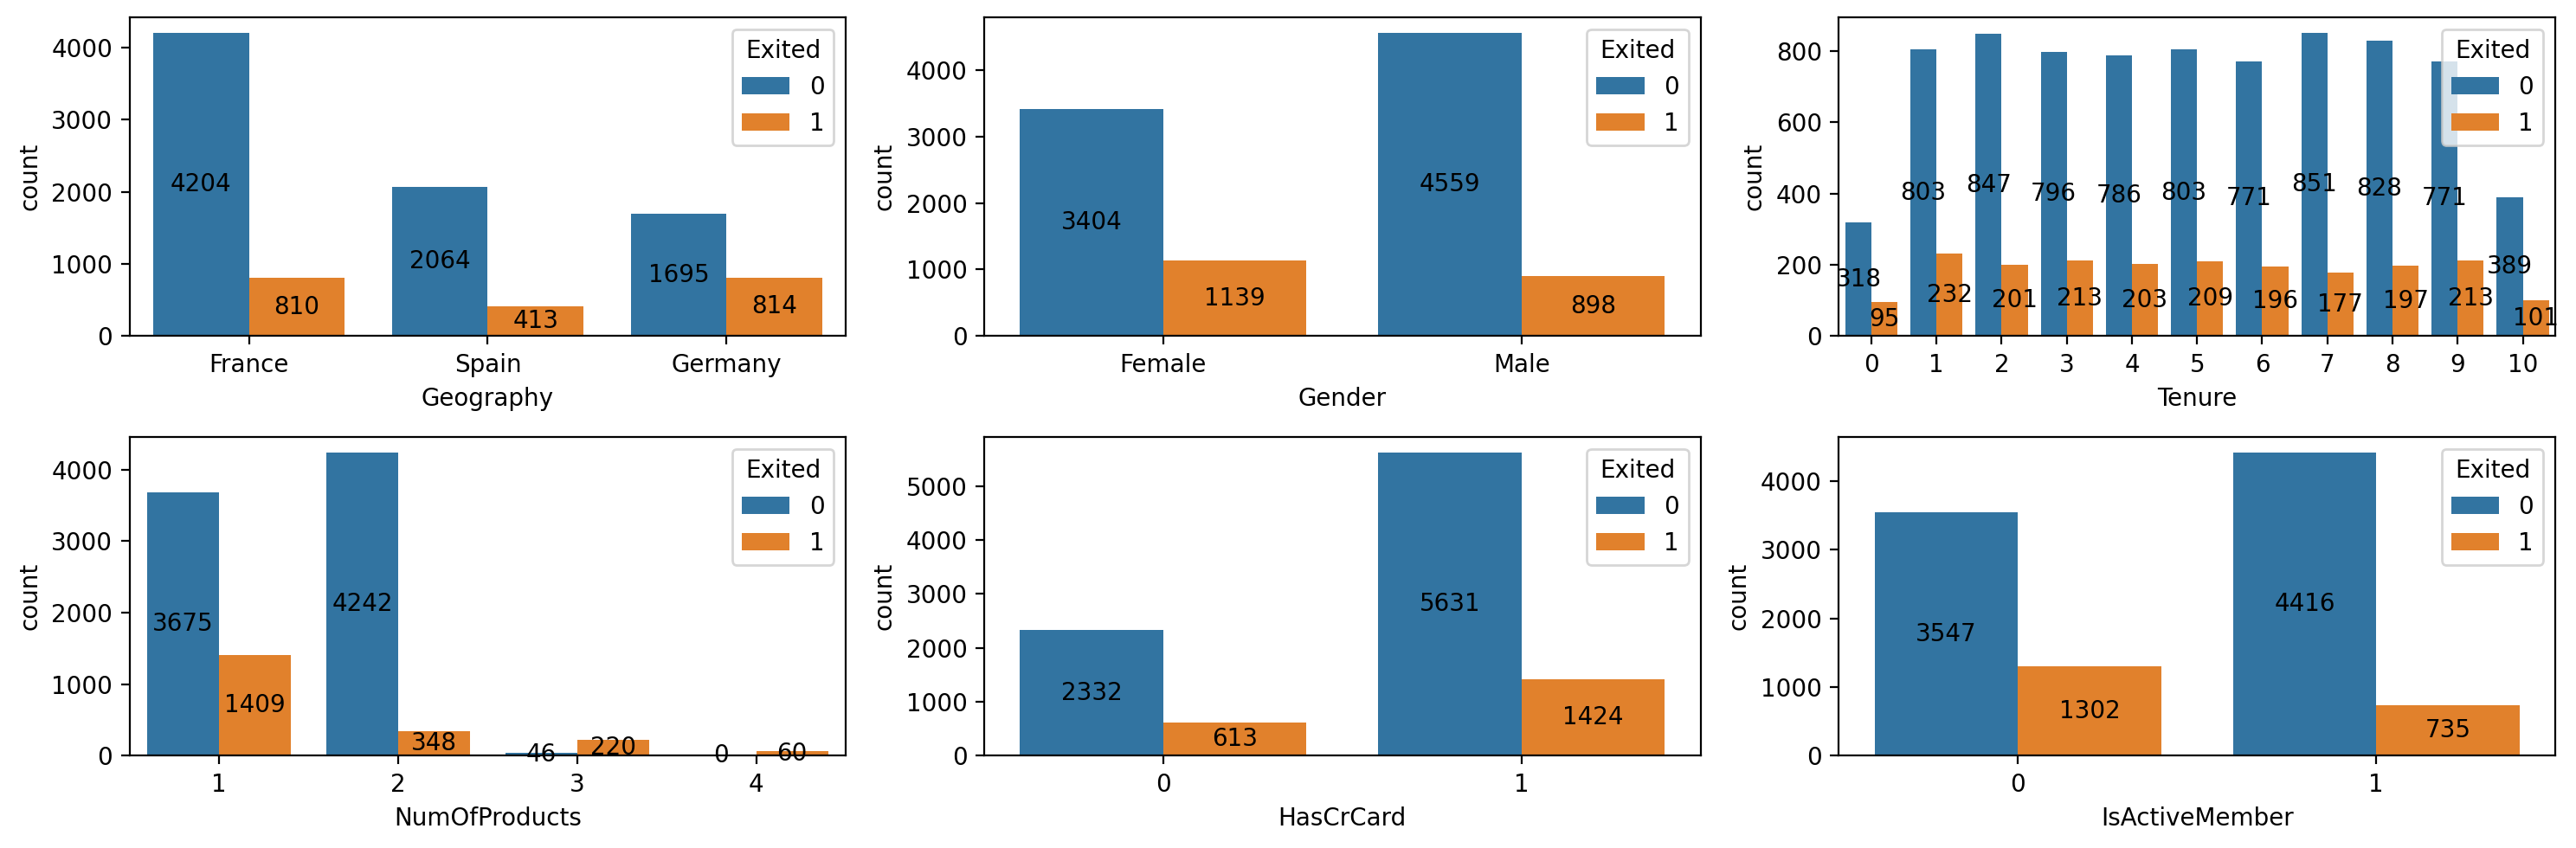

In [7]:
plt.figure(figsize=(15,5), dpi= 200)

for i, column in enumerate(columns):
    plt.subplot(2, 3, i+1)
    ax = sns.countplot(x= column, data= X, hue= y)
    for container in ax.containers:
        ax.bar_label(container, label_type= 'center')

plt.tight_layout()
plt.show()

In [8]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

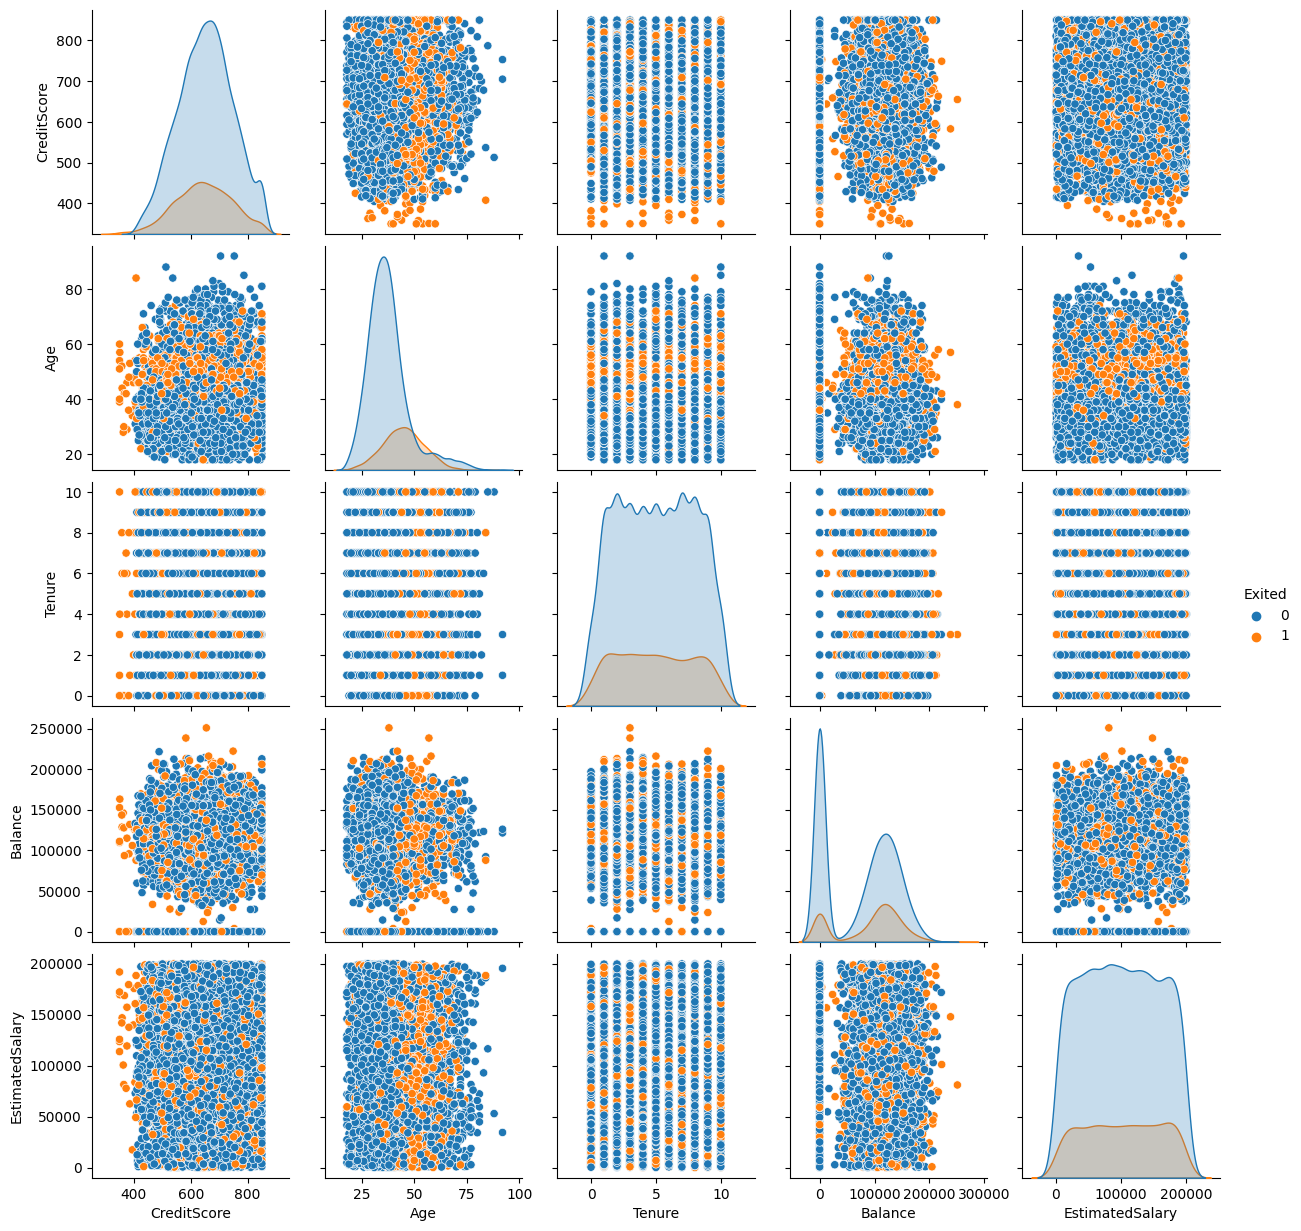

In [9]:
sns.pairplot(data= data, vars=['CreditScore', 'Age', 'Tenure', 'Balance',
        'EstimatedSalary'], hue= 'Exited' )

In [10]:
cat_col = ['Gender', 'Geography']

In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

onehot_encoder = OneHotEncoder(sparse_output= False, drop= 'first')
X_array = onehot_encoder.fit_transform(X[cat_col])
X[onehot_encoder.get_feature_names_out()] = X_array
X.drop(cat_col, axis=1, inplace=True)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
9996,516,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
9997,709,36,7,0.00,1,0,1,42085.58,0.0,0.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1.0,1.0,0.0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((8000, 11), (2000, 11), (8000,), (2000,))

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, InputLayer
from tensorflow.python.keras.optimizer_v1 import Adam

In [15]:
input_shape = X_train.shape[1]
input_shape

11

In [16]:
class_weight = y.value_counts().to_dict()
class_weight

{0: 7963, 1: 2037}

In [17]:
total_sample = sum(class_weight.values())
class_weights = total_sample/(len(class_weight)*class_weight[0]), total_sample/(len(class_weight)*class_weight[1])

In [18]:
model = Sequential([
    InputLayer(input_shape),
    Dense(128, activation= 'relu'),
    Dense(128, activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 18,177
Trainable params: 18,177
Non-trainable params: 0
_________________________________________________________________


In [20]:
from tensorflow.python.keras.losses import BinaryCrossentropy

model.compile(optimizer= 'Adam', loss= BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
class_weight = {0: class_weights[0], 1: class_weights[1]}
class_weight.keys()

dict_keys([0, 1])

In [22]:
history = model.fit(X_train, y_train, batch_size= 32, epochs= 10, class_weight= class_weight, validation_split= 0.1)

Epoch 1/10
225/225 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7239 - val_loss: 0.4807 - val_accuracy: 0.7850
Epoch 2/10
225/225 [==============================] - 0s 857us/step - loss: 0.4878 - accuracy: 0.7692 - val_loss: 0.4059 - val_accuracy: 0.8175
Epoch 3/10
225/225 [==============================] - 0s 853us/step - loss: 0.4724 - accuracy: 0.7837 - val_loss: 0.4493 - val_accuracy: 0.7663
Epoch 4/10
225/225 [==============================] - 0s 853us/step - loss: 0.4644 - accuracy: 0.7874 - val_loss: 0.4468 - val_accuracy: 0.7950
Epoch 5/10
225/225 [==============================] - 0s 871us/step - loss: 0.4571 - accuracy: 0.7892 - val_loss: 0.5273 - val_accuracy: 0.7462
Epoch 6/10
225/225 [==============================] - 0s 860us/step - loss: 0.4494 - accuracy: 0.7969 - val_loss: 0.4217 - val_accuracy: 0.8062
Epoch 7/10
225/225 [==============================] - 0s 857us/step - loss: 0.4402 - accuracy: 0.8014 - val_loss: 0.4748 - val_accuracy: 0

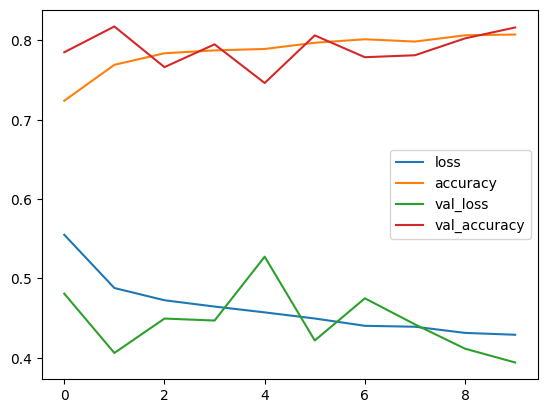

In [23]:
if history is not None:
    (pd.DataFrame(history.history)).plot()

In [24]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1593
           1       0.52      0.71      0.60       407

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.73      2000
weighted avg       0.84      0.81      0.82      2000

